In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt

#required resources; download once
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

Targeted column name: content


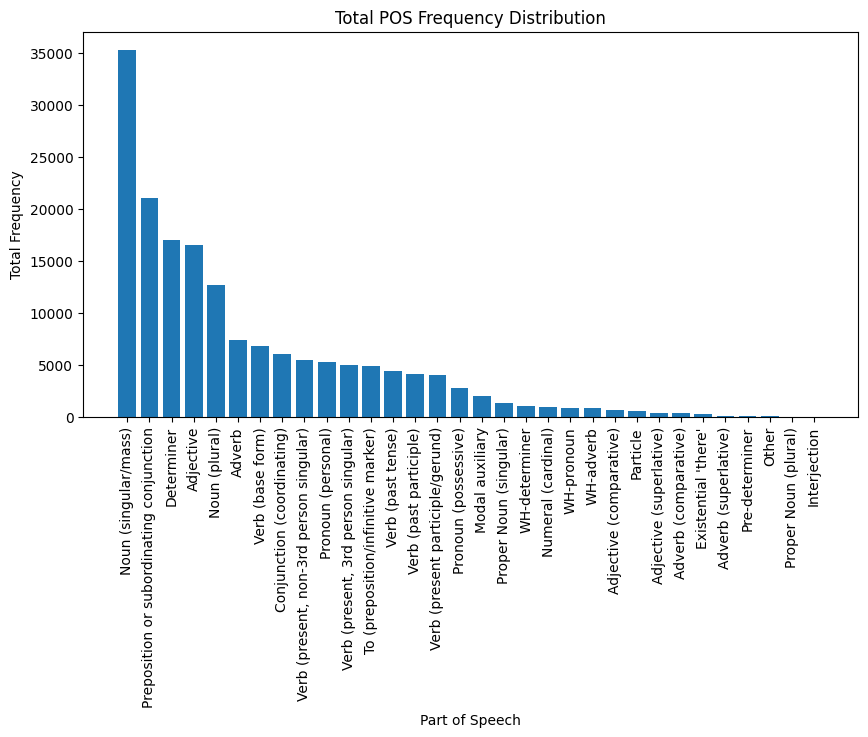

In [16]:
df = pd.read_csv('data/news_sample_3.csv')

column_index = 5
if df.shape[1] > column_index:
    text_column = df.iloc[:, column_index].dropna().astype(str)  # Convert to string
    print(f"Targeted column name: {df.columns[column_index]}")  # Print column name
else:
    raise IndexError("something's wrong!")


# POS Mapping Dictionary
pos_mapping = {
    "CC": "Conjunction (coordinating)", "CD": "Numeral (cardinal)", "DT": "Determiner",
    "EX": "Existential 'there'", "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective", "JJR": "Adjective (comparative)", "JJS": "Adjective (superlative)",
    "LS": "List item marker", "MD": "Modal auxiliary", "NN": "Noun (singular/mass)",
    "NNS": "Noun (plural)", "NNP": "Proper Noun (singular)", "NNPS": "Proper Noun (plural)",
    "PDT": "Pre-determiner", "POS": "Genitive marker ('s)", "PRP": "Pronoun (personal)",
    "PRP$": "Pronoun (possessive)", "RB": "Adverb", "RBR": "Adverb (comparative)",
    "RBS": "Adverb (superlative)", "RP": "Particle", "TO": "To (preposition/infinitive marker)",
    "UH": "Interjection", "VB": "Verb (base form)", "VBD": "Verb (past tense)",
    "VBG": "Verb (present participle/gerund)", "VBN": "Verb (past participle)",
    "VBP": "Verb (present, non-3rd person singular)", "VBZ": "Verb (present, 3rd person singular)",
    "WDT": "WH-determiner", "WP": "WH-pronoun", "WRB": "WH-adverb"
}


# Function to process each row
def process_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Convert POS tags to human-readable format
    readable_tags = [pos_mapping.get(tag, "Other") for _, tag in pos_tags]
    
    # Count occurrences of each word class
    pos_counts = {pos: readable_tags.count(pos) for pos in set(readable_tags)}
    
    return pos_counts

# Apply function to each row and create a new DataFrame
df_pos = text_column.apply(process_text).apply(pd.Series).fillna(0).astype(int)

# Add original text for reference
df_pos.insert(0, "Original_Text", text_column)

# Display result
#print(df_pos.head())

# Save to CSV
df_pos.to_csv("pos_analysis.csv", index=False)

# Optional: Aggregate and plot total POS counts
pos_totals = df_pos.drop(columns=["Original_Text"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_totals.index, pos_totals.values)
plt.xlabel("Part of Speech")
plt.ylabel("Total Frequency")
plt.title("Total POS Frequency Distribution")
plt.xticks(rotation=90)
plt.show()